<a href="https://colab.research.google.com/github/shashwat-2077/Flipkart_NLP/blob/main/Topic_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing

Natural Language Processing, usually shortened as NLP, is a branch
of artificial intelligence that deals with the interaction between
computers and humans using the natural language. We will be using
NLP to clean our reviews. A sentence or paragraph always contains
words that don’t contribute much to understand the context. We
need to scrape reviews of the product we want to analyze. We have
already done this for you, now you just have to download and load
the data.

# Gather Data
You can use any text data that you can get. We have
scrapped reviews of a particular product.
# Tokenization
Tokenization is the process of breaking down sentence or
paragraphs into smaller chunks of words called tokens

#Tokenization using Spacy


In [30]:
import spacy

nlp = spacy.load('en_core_web_sm')

In [31]:
text = "Mobile phone is good but the camera is not."

In [32]:
doc = nlp(text)

In [33]:
for i in doc:
  print(i)

Mobile
phone
is
good
but
the
camera
is
not
.


In [34]:
#Stop Words Removal

In [35]:
from spacy.lang.en.stop_words import STOP_WORDS

In [36]:
len(STOP_WORDS)

326

In [37]:
print(STOP_WORDS)

{'have', 'amongst', 'whether', 'as', 'us', 'who', 'thereby', 'noone', 'becoming', 'whole', 'since', 'would', 'whence', 'although', 'here', 'rather', 'before', 'all', 'such', 'see', 'whom', 'give', 'herein', 'never', 'until', 'on', 'always', 'by', 'may', 'hereby', 'say', 'our', 'about', 'still', 'below', 'hereafter', 'thus', 'himself', 'not', 'just', 'both', 'with', 'and', 'least', 'four', 'mine', 'take', 'ever', 'also', 'ten', 'into', 'ourselves', 'few', 'meanwhile', 'than', 'please', 'full', 'back', 'very', 'became', 'sometime', 'wherein', 'am', 'my', 'might', 'during', 'somewhere', 'were', 'that', 'its', '‘d', 'using', 'their', 'seem', '’re', 'but', 'unless', 'forty', 'no', 'what', 'other', 'another', 'further', 'to', 'yourself', 'same', 'off', 'across', 'five', 'per', 'whatever', 'part', 'call', 'eleven', 'due', 'are', 'except', 'nothing', 'next', 'in', 'really', 'when', 'name', '’m', 'those', 'whoever', 'his', 'seems', 'hence', 'where', 'enough', 'anyway', 'front', 'neither', 'firs

In [38]:
for i in doc:
  if i.is_stop !=True and i.is_punct != True:
    print(i)

Mobile
phone
good
camera


#Vectorization

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

In [40]:
vectorizer = CountVectorizer()

In [41]:
sample_text = ['Julie loves John more than Linda loves John','Jane loves John more than Julie loves John']

In [42]:
vectorizer.fit(sample_text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [43]:
print(vectorizer.vocabulary_)

{'julie': 2, 'loves': 4, 'john': 1, 'more': 5, 'than': 6, 'linda': 3, 'jane': 0}


In [44]:
vector = vectorizer.transform(['Julie loves John more than Linda loves John'])

In [45]:
print(vector)

  (0, 1)	2
  (0, 2)	1
  (0, 3)	1
  (0, 4)	2
  (0, 5)	1
  (0, 6)	1


In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [47]:
tfvectorizer = TfidfVectorizer()

In [48]:
tfvectorizer.fit(sample_text)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [49]:
tfvectorizer.vocabulary_

{'jane': 0,
 'john': 1,
 'julie': 2,
 'linda': 3,
 'loves': 4,
 'more': 5,
 'than': 6}

In [50]:
vector1 = tfvectorizer.transform(['Julie loves John more than Linda loves John'])

In [51]:
print(vector1)

  (0, 6)	0.2776136126156931
  (0, 5)	0.2776136126156931
  (0, 4)	0.5552272252313862
  (0, 3)	0.39017624606721324
  (0, 2)	0.2776136126156931
  (0, 1)	0.5552272252313862


In [52]:
print(vector)

  (0, 1)	2
  (0, 2)	1
  (0, 3)	1
  (0, 4)	2
  (0, 5)	1
  (0, 6)	1


## Topic Modeling Using LDA

In [53]:
import spacy
nlp = spacy.load('en_core_web_sm')

import gensim

import pandas as pd
from gensim import corpora

import re

In [54]:
nlp.vocab['star'].is_stop = True
nlp.vocab['stars'].is_stop = True
nlp.vocab['good'].is_stop = True

In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
#pandas
reviews = pd.read_csv('/content/drive/MyDrive/Code/Flipkart/Flipkart_ratings.csv')

In [57]:
reviews.shape

(4652, 13)

In [58]:
#pandas
reviews['star_rating'] = reviews['star_rating'].apply(lambda x:1 if x > 4 else 0)

In [59]:
#pandas
negative_sentiments = reviews[reviews['star_rating'] == 0]
print(negative_sentiments.shape[0])

2082


In [60]:
#pandas
negative_sentiments['Final review'] = negative_sentiments['review_headline'] + ' ' + negative_sentiments['review_body']
negative_sentiments['Final review'] = negative_sentiments['Final review'].str.replace("[^a-zA-Z#]", " ")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [61]:
#pandas
negative_sentiments = negative_sentiments.dropna()

In [62]:
#tokenization, stop words removal
negative_sentiments['Final Text'] = ''
for i in range(negative_sentiments.shape[0]):
    temp = []
    document = nlp(negative_sentiments['Final review'].iloc[i].lower())
    for j in document:
        if j.is_stop!=True and j.is_punct!=True:
            temp.append(j.lemma_)
    negative_sentiments['Final Text'].iloc[i] = temp


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [63]:
#vectoriazation and topic modeling 
def topic_modelling(text):
    dictionary = corpora.Dictionary(text)
    doc_term_matrix = [dictionary.doc2bow(rev) for rev in text]
    LDA = gensim.models.ldamodel.LdaModel
    lda_model = LDA(corpus = doc_term_matrix, id2word = dictionary, 
                    num_topics = 1, random_state = 19, passes = 50)
    temp = re.findall('[a-z]*',lda_model.print_topics()[0][1])
    tags = [x for x in temp if x]
    return tags

In [64]:
#pandas
negative_sentiments['Final Text'] = negative_sentiments['Final Text'].apply(lambda x:' '.join(x))
negative_sentiments.head(2)

,marketplace,customer_id,review_id,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,Final review,Final Text
0,US,41099022,R59VGL4HIPFDP,Foscam FI8910W Wireless/Wired Pan & Tilt IP/Ne...,Camera,0,0,1,N,Y,One Star,garbage,31-08-2015,One Star garbage,garbage
1,US,15744366,R3GR0Z9Z4Z1295,Foscam FI8910W Wireless/Wired Pan & Tilt IP/Ne...,Camera,0,0,0,N,N,Doesn't work as advertised,"Didn't work as advertised, there was no sound ...",31-08-2015,Doesn t work as advertised Didn t work as adve...,doesn t work advertise didn t work advertise ...


In [65]:
#pandas
negative_sentiments['Review Tags'] = negative_sentiments['Final Text'].apply(lambda x: topic_modelling([x.split(' ')]))
negative_sentiments.head(2)

,marketplace,customer_id,review_id,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,Final review,Final Text,Review Tags
0,US,41099022,R59VGL4HIPFDP,Foscam FI8910W Wireless/Wired Pan & Tilt IP/Ne...,Camera,0,0,1,N,Y,One Star,garbage,31-08-2015,One Star garbage,garbage,[garbage]
1,US,15744366,R3GR0Z9Z4Z1295,Foscam FI8910W Wireless/Wired Pan & Tilt IP/Ne...,Camera,0,0,0,N,N,Doesn't work as advertised,"Didn't work as advertised, there was no sound ...",31-08-2015,Doesn t work as advertised Didn t work as adve...,doesn t work advertise didn t work advertise ...,"[t, advertise, work, didn, doesn, record, refu..."


In [66]:
from functools import reduce

final_list = reduce(lambda x,y :x+y ,negative_sentiments['Review Tags'].dropna().values.tolist())
final_list

['garbage',
 't',
 'advertise',
 'work',
 'didn',
 'doesn',
 'record',
 'refund',
 'return',
 'sound',
 'average',
 'complicate',
 'setup',
 'user',
 'way',
 'yrs',
 'camera',
 'die',
 'save',
 'remotely',
 're',
 'scan',
 'savvy',
 'robust',
 'review',
 'wonder',
 'wifi',
 'want',
 't',
 'stop',
 'show',
 'set',
 'security',
 'money',
 'waste',
 'unreliable',
 'unbelievably',
 'totally',
 's',
 'impossible',
 'consistently',
 'completely',
 'ac',
 'adapter',
 'die',
 'year',
 'work',
 'night',
 'kid',
 'monitor',
 'wake',
 'ok',
 'single',
 'aware',
 'loudly',
 'set',
 'hour',
 'device',
 'attempt',
 'want',
 'silly',
 'setup',
 'simple',
 'spend',
 'remote',
 'br',
 'model',
 't',
 'buy',
 'new',
 'lack',
 'hour',
 'purchase',
 'price',
 'work',
 'connect',
 'didn',
 'forget',
 'send',
 't',
 'camera',
 'work',
 'foscam',
 'die',
 'longer',
 'set',
 'great',
 't',
 'don',
 'set',
 'pain',
 'link',
 'd',
 'camera',
 'product',
 'return',
 'plug',
 'require',
 'camera',
 'light',
 'reb

In [67]:
dic = {}
for i in final_list:
    if i not in dic.keys():
        dic[i] = 1
    else:
        dic[i] = dic[i] + 1

In [68]:
#pandas
df = pd.Series(dic)
df = df.drop(['t','s'])
df = df.sort_values(ascending = False)
df.head(20)

camera      1009
work         642
br           622
set          489
support      304
great        269
foscam       269
setup        233
product      191
use          176
time         166
quality      152
tech         149
try          145
router       137
software     137
wireless     136
price        130
buy          130
return       122
dtype: int64

In [69]:
#data visualization, matplotlib & seaborn
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


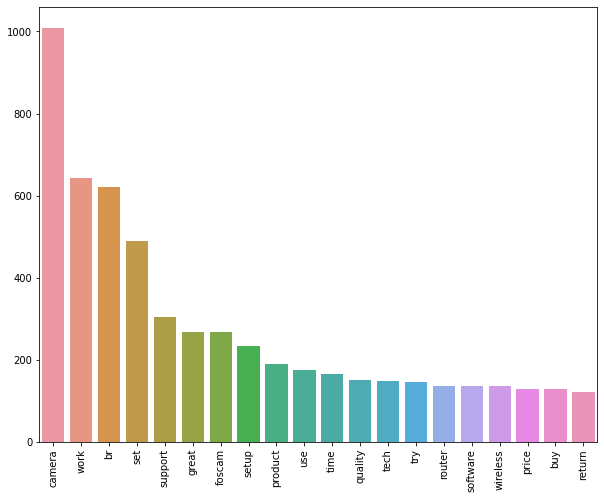

In [70]:
#data visualization, matplotlib & seaborn
fig = plt.figure(figsize = (10,8))
sns.barplot(df.head(20).index.values.tolist(), df.head(20).values.tolist())
plt.xticks(rotation = 90)
plt.show()

In [72]:

#Drive link :

# https://drive.google.com/drive/folders/1f1BzN1I0jogisJp3qlkTKj0dlG1Ljgiy?usp=sharing